In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfinv
from scipy.stats import cauchy

In [12]:
Quantile_Lorentzian = lambda x,d,N : np.array([d*np.tan(np.pi/2 * (2*i - (N + 1))/(N+1)) + x for i in range(1,N+1)])
Quantile_Normal = lambda mu,sigma,N : np.array([mu +sigma*(2**0.5)*erfinv((2*i - N - 1)/(N+1)) for i in range(1,N+1)])

In [13]:
Q_L = lambda mu,d,p: d*np.tan(np.pi/2 * (2*p - 1)) + mu
Q_L_ALL = lambda mu,d,N:Q_L(mu,d,np.random.rand(N))

In [5]:
N = 5000
eps = 1e-3
random = np.arange(1,N+1)/(N+1) + eps * (2*np.random.rand(N)-1)
Q_L_re= Q_L(0,1,random)
np.random.seed(0)
Q_L_rnd= Q_L(0,1,np.random.rand(N))

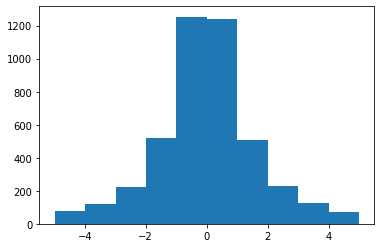

In [6]:
plt.hist(Q_L_re[abs(Q_L_re)<5],bins=10);
# plt.hist(Q_L_rnd[abs(Q_L_rnd)<5],bins=1000);

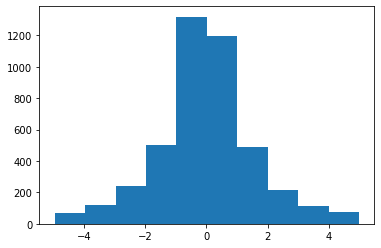

In [7]:
plt.hist(Q_L_rnd[abs(Q_L_rnd)<5],bins=10);


(array([   0.,    0.,    0.,    0.,    0., 5000.,    0.,    0.,    0.,
           0.]),
 array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5]),
 <BarContainer object of 10 artists>)

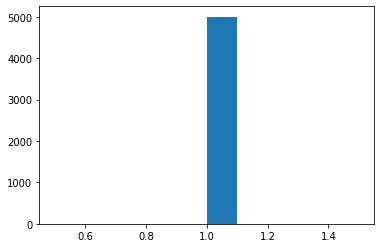

In [8]:
plt.hist([1 if i else 0 for i in np.isclose(Q_L_rnd,cauchy.rvs(0,1,N,random_state=0))])

([<matplotlib.axis.XTick at 0x1ce7e0828c0>,
 [Text(0, 0, 'False'), Text(1, 0, 'True')])

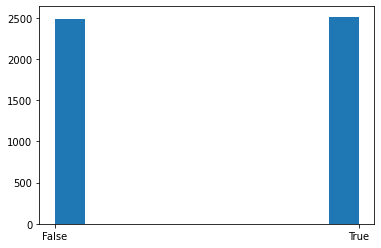

In [11]:
plt.hist([1 if i else 0 for i in Q_L_rnd==cauchy.rvs(0,1,N,random_state=0)])
plt.xticks([0,1],['False','True'])

# Scenario 1
Change all omega to random state  
>> Fast oscillator can be slow at next time


In [57]:
from TO_sim.Sol_Kuramoto import *
from TO_sim.gen_Distribution import *
import matplotlib.pyplot as plt
import parmap
import numpy as np
# from tqdm import tqdm_notebook
from TO_sim.To_Draw import *
from tqdm.notebook import tqdm

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

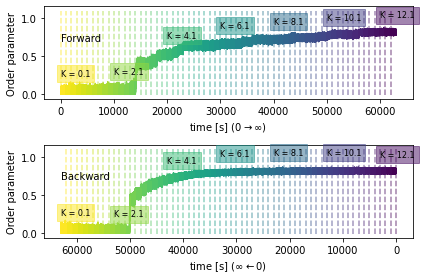

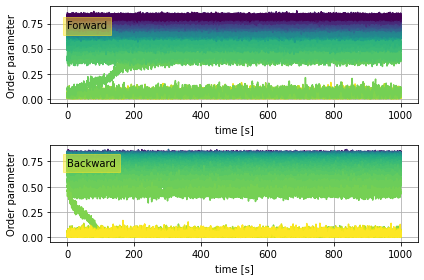

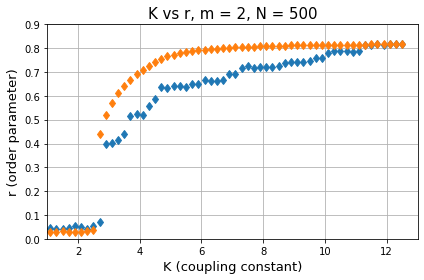

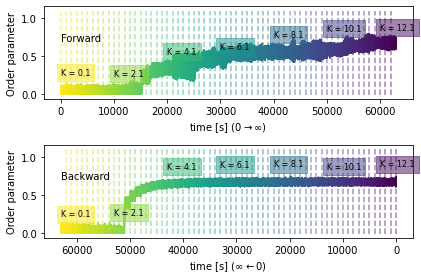

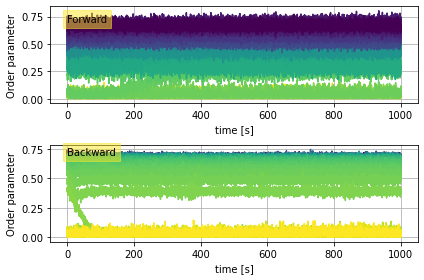

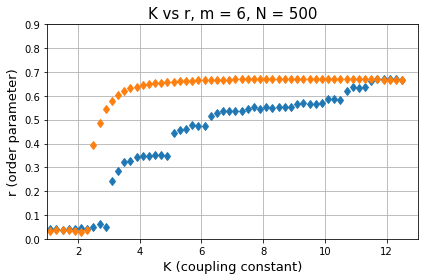

In [58]:
for m in [2,6]:
    N  =  500
    K_start = 0.1
    K_end = 12.5
    dK = 0.2
    Ks = np.arange(K_start,K_end + dK,dK)
    # m = 2
    dtheta_init = np.zeros(N)
    t_end = 1000
    dt = 0.1
    dist = "Quantile Lorentzian" 
    if dist == "Normal":
        theta_init,omega_init, Kc = Normal(N,0,1,seed=0)
    elif dist == "Lorentzian":
        theta_init,omega_init, Kc = Lorentzian(N,0,1,seed=0)
    elif dist == "Quantile Lorentzian":
        theta_init,omega_init, Kc = Quantile_Lorentzian(N,0,1,seed=0)
        
    theta_dic = {}
    dtheta_dic = {}
    rs_dic = {}
    omega_dic = {}
    t_dic = {}

    num = 0
    for K in tqdm(Ks):
        if num == 0:
            omega = np.sort(Q_L_ALL(0,1,N))
            
            theta_s,dtheta_s,omega,rs,t = Sol_Kuramoto_mf(N,K,m,(0,t_end),dt=dt,p_theta=theta_init,p_dtheta=dtheta_init,p_omega=omega,distribution="Normal")
        else:
            omega =  np.sort(Q_L_ALL(0,1,N))
            theta_s,dtheta_s,omega,rs,t = Sol_Kuramoto_mf(N,K,m,(0,t_end),dt=dt,p_theta=theta_dic[num-1][-1],p_dtheta=dtheta_dic[num-1][-1],
                                                        p_omega=omega,distribution="Normal")
            # theta_s,dtheta_s,omega,rs,t = Sol_Kuramoto_mf(N,K,m,(0,t_end),dt=dt,p_theta=theta_dic[num-1][-1],p_dtheta=dtheta_init,p_omega=omega_dic[num-1],distribution="Normal")
        theta_dic[num] = theta_s
        dtheta_dic[num] = dtheta_s
        rs_dic[num] = rs
        omega_dic[num] = omega
        t_dic[num] = t + num*t_end
        num += 1
    theta_r_init,dtheta_r_init = theta_dic[num-1][-1],dtheta_dic[num-1][-1]

    theta_r_dic = {}
    dtheta_r_dic = {}
    rs_r_dic = {}
    omega_r_dic = {}
    t_r_dic = {}
    dKr = -0.2
    Ksr = np.arange(K_end,K_start + dKr,dKr)

    num_r = 0
    for K in tqdm(Ksr):
        if num_r == 0:
            theta_s,dtheta_s,omega,rs,t = Sol_Kuramoto_mf(N,K,m,(0,t_end),dt=dt,p_theta=theta_r_init,p_dtheta=dtheta_r_init,p_omega=omega_init,distribution=dist)
            # theta_s,dtheta_s,omega,rs,t = Sol_Kuramoto_mf(N,K,m,(0,t_end),dt=dt,p_theta=theta_r_init,p_dtheta=dtheta_init,p_omega=omega_init,distribution=dist)
        else:
            theta_s,dtheta_s,omega,rs,t = Sol_Kuramoto_mf(N,K,m,(0,t_end),dt=dt,p_theta=theta_r_dic[num_r-1][-1],
                                                        p_dtheta=dtheta_r_dic[num_r-1][-1],p_omega=omega_r_dic[num_r-1],distribution=dist)
            # theta_s,dtheta_s,omega,rs,t = Sol_Kuramoto_mf(N,K,m,(0,t_end),dt=dt,p_theta=theta_r_dic[num_r-1][-1],p_dtheta=dtheta_init,p_omega=omega_r_dic[num_r-1],distribution=dist)
        theta_r_dic[num_r] = theta_s
        dtheta_r_dic[num_r] = dtheta_s
        rs_r_dic[num_r] = rs
        omega_r_dic[num_r] = omega
        t_r_dic[num_r] = t + num_r*t_end
        num_r += 1
    # Time_R(Ks,t_dic,rs_dic,t_r_dic,rs_r_dic,dK,dt,t_end,N,m,mean_time=50,save=True,Folder_name="Review2/Disorder_Omega")
    Time_R(Ks,t_dic,rs_dic,t_r_dic,rs_r_dic,dK,dt,t_end,N,m,mean_time=50,save=True,Folder_name="Review2/Ordered_Omega")

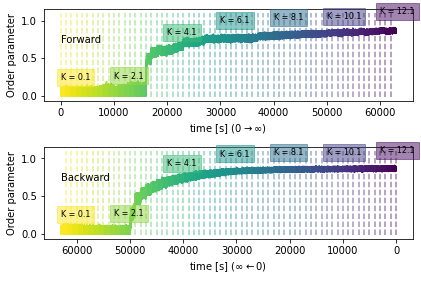

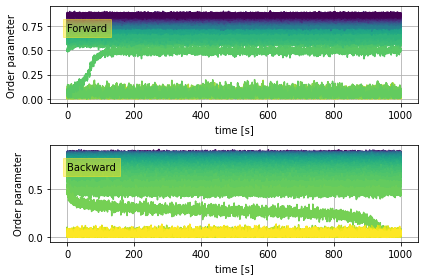

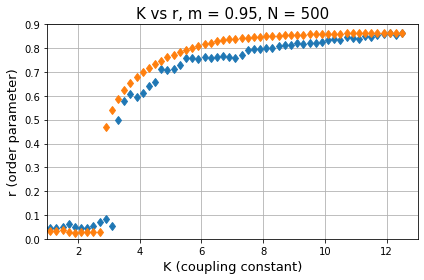

In [55]:
# Time_R(Ks,t_dic,rs_dic,t_r_dic,rs_r_dic,dK,dt,t_end,N,m,mean_time=50,save=True,Folder_name="Review2/Disorder_Omega")
Time_R(Ks,t_dic,rs_dic,t_r_dic,rs_r_dic,dK,dt,t_end,N,m,mean_time=50,save=True,Folder_name="Review2/Ordered_Omega")

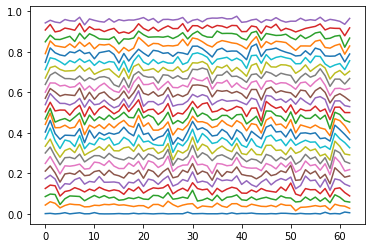

In [36]:
R_P = np.array(np.sort([np.random.rand(N) for _ in range(63)]))
A =np.array([Q_L(0,1,R_) for R_ in R_P])
plt.plot(R_P[:,::20]);

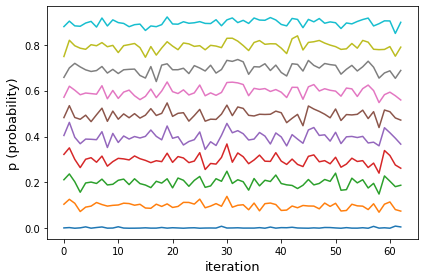

In [46]:
plt.plot(R_P[:,::50]);
plt.xlabel("iteration",fontsize=13)
plt.ylabel("p (probability)",fontsize=13)
plt.tight_layout()
plt.savefig(f'Review2/P all noise.png',dpi=400)

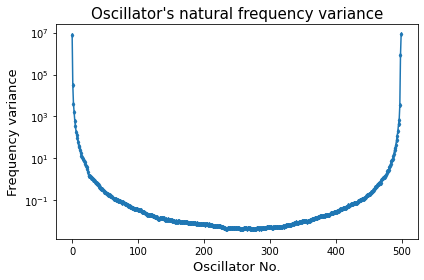

In [48]:
plt.plot(np.var(A,axis=0)[:],'-d',markersize=3)
plt.yscale('log')
plt.xlabel("Oscillator No.",fontsize=13)
plt.ylabel("Frequency variance",fontsize=13)
plt.title("Oscillator's natural frequency variance",fontsize=15)
plt.tight_layout()
plt.savefig('Review2/Scenario 1-2 Oscillator\'s natural frequency variance.png',dpi=400)
# plt.plot(np.var(A,axis=0)[:-10])

In [22]:
int_ =np.linspace(0.05,0.95,500)
color = plt.cm.hsv(int_)

In [23]:
np.diff(A,axis=0).shape

(62, 500)

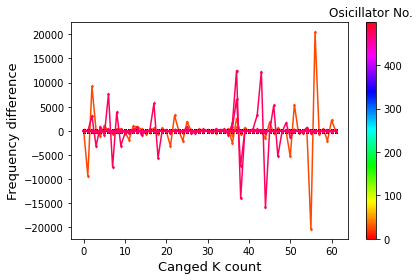

In [39]:
for i,temp  in enumerate((np.diff(A,axis=0).T[::])):
    plt.plot(temp,'-d',color=color[i],markersize=2)

Temp = plt.scatter(np.zeros(N),np.zeros(N),c=np.arange(0,N),s=0)
# plt.yscale('log')
plt.xlabel("Canged K count",fontsize=13)
plt.ylabel("Frequency difference",fontsize=13)
# plt.title("Oscillator's frequency variation from mena",fontsize=15)
plt.hsv()
clb = plt.colorbar(Temp)
clb.ax.set_title('Osicillator No.')
plt.tight_layout()

# plt.savefig('Review2/Oscillator\'s natural frequency log diff.png',dpi=400)


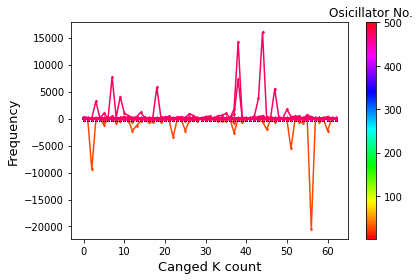

In [47]:
for i,temp  in enumerate(A.T[::]):
    plt.plot(temp,'-d',color=color[i],markersize=2)

Temp = plt.scatter(np.zeros(N),np.zeros(N),c=np.arange(1,N+1),s=0)
# plt.yscale('log')
plt.xlabel("Canged K count",fontsize=13)
plt.ylabel("Frequency",fontsize=13)
# plt.title("Oscillator's frequency variation from mena",fontsize=15)
plt.hsv()
clb = plt.colorbar(Temp)
clb.ax.set_title('Osicillator No.')
plt.tight_layout()

plt.savefig('Review2/Scenario 1-2 Oscillator\'s frequency.png',dpi=400)


In [ ]:
for temp  in (A.T-np.mean(A,axis=1))[20:-20:10]:
    plt.plot(temp)